 Insights from Overwatch League

In [1]:
#Needed packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Introduction

**Business Context.** Supposed I work for Overwatch League, the premier esports league for the game Overwatch. They have collected data about past pro tournaments and would like you to answer some questions about past tournaments. Build visualizations and answer the questions below. 

**About Overwatch League.** In the Overwatch League, teams of professional players compete against each other to be the best in the world at playing the team-based first-person shooter game, Overwatch.

Each match consists of two teams of six players each, with each player selecting one of the game's many heroes to play as. The teams are then tasked with completing various objectives, such as escorting a payload across the map or capturing and holding control points.

The team that is able to complete their objectives the quickest or prevent the other team from completing their objectives wins the match.

Matches are typically played in a best-of-three format, meaning that the first team to win two rounds is declared the winner. Each round is called a "map", and the team that wins the most maps wins the match.

The Overwatch League is divided into two seasons per year, with teams from all around the world competing in a variety of different venues. The top teams from each season advance to the playoffs, where they compete for the chance to be crowned the Overwatch League champion. Each map is one of two types, it is either a control map or an escort map.  

**Business Problem.** My task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

- **Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each match like winning team, map type, date of match, tournament title, etc. 
You will be performing the following tasks on the data:

1. Read, transform, and prepare data for visualization
2. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these.

 loading in and getting an overview

**1a) (1 mark)**  Use the pandas function ```read_csv()``` to load the file ```match_map_stats.csv``` as a DataFrame. Name this DataFrame ```df```. 

In [2]:
df = pd.read_csv("match_map_stats.csv")


**1b) (1 mark)** Print the first 5 rows of the DataFrame

In [4]:
df.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,01/11/18 00:12,01/11/18 00:20,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.61505,0.00000,0.000000,240.000,NaN,NaN,2,0
1,01/11/18 00:22,01/11/18 00:27,2018: Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.64960,75.61505,125.750570,0.000,NaN,NaN,3,2
2,01/11/18 00:34,01/11/18 00:38,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,250.492000,240.000,NaN,NaN,2,0
3,01/11/18 00:40,01/11/18 00:44,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,225.789030,250.492,NaN,NaN,2,2
4,01/11/18 00:46,01/11/18 00:49,2018: Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.00000,0.00000,36.396057,250.492,NaN,NaN,4,2


**1c) (1 mark)** Print the column names in `df`

In [6]:
print(df.columns)


Index(['round_start_time', 'round_end_time', 'stage', 'match_id',
       'game_number', 'match_winner', 'map_winner', 'map_loser', 'map_name',
       'map_round', 'winning_team_final_map_score',
       'losing_team_final_map_score', 'control_round_name', 'Attacker',
       'Defender', 'team_one_name', 'team_two_name',
       'attacker_payload_distance', 'defender_payload_distance',
       'attacker_time_banked', 'defender_time_banked',
       'attacker_control_perecent', 'defender_control_perecent',
       'attacker_round_end_score', 'defender_round_end_score'],
      dtype='object')


We have the following columns

- **round_start_time** Stating time of the round
- **round_end_time** Ending time of the round
- **stage** Stage of the competition
- **match_id** Id for the match
- **game_number** Game number in the given match
- **match_winner** Winner of the match
- **map_winner** Winner of the game/map
- **map_loser** Lost of the game/map
- **map_name** Name of map
- **map_round** Round number (each map has several rounds)
- **winning_team_final_map_score** Final score of map winner
- **losing_team_final_map_score** Final score of map loser
- **control_round_name** Name of the round if it was a control type map
- **attacker** Team that was the attacker
- **defender** Team that was the defender
- **team_one_name** Name of first team in match
- **team_two_name** Name of second team in match
- **attacker_payload_distance** Distance the attacker moved the payload on payload maps
- **defender_payload_distance** 
- **attacker_time_banked** Attacker time left over
- **defender_time_banked** Defender time left over
- **attacker_control_perecent** Percent objective was charged by the attacker team
- **defender_control_perecent** Percent objective was charged by the defender team
- **attacker_round_end_score** Attacker score at the end of this round
- **defender_round_end_score** Defender score at the end of this round

**1d)  Answer the folowing question:

Overwatch is aiming to expand their fanbase through the following advertising campaigns:

- [x] Advertising the most popular teams
- [x] Promoting a rematch between last years best teams
- [x] Creating an underdog story by highlighting last years worst performing teams
- [ ] Which demographics are more likely to buy tickets?

Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.



Cleaning the data 

In this dataset there are two types of maps, escort and control. On control maps, the teams try to control an objective until the meter reaches 100. On escort maps, the attacker tries to escort a payload to the end of the map, while the defender tries to stop it. Control maps can be found in the dataset by rows where the `control_perecent` is not 0 for at least one team. That is, `control_perecent` will be Nan or 0 for both teams when the map is **not** a control map. 
- 2a)  Create a variable for map type called map_type, which has two possible values "control" and "escort". 
- 2b)  For rows which correspond to control maps, set the time_banked and payload distance values to `NaN`. 
- 2c)  Ensure that `round_start_time` and `round_end_time` time variables are in the `date_time` format (print out the type) and create a variable called `year` which contains the year the match took place

In [8]:

df["map_type"] = np.where(
    (df["attacker_control_perecent"].fillna(0) > 0) | 
    (df["defender_control_perecent"].fillna(0) > 0),
    "control",
    "escort"
)


In [9]:
control_mask = df["map_type"] == "control"
df.loc[control_mask, ["attacker_time_banked", "defender_time_banked",
                      "attacker_payload_distance", "defender_payload_distance"]] = np.nan


In [10]:

# Convert round_start_time and round_end_time to datetime format
df["round_start_time"] = pd.to_datetime(df["round_start_time"])
df["round_end_time"] = pd.to_datetime(df["round_end_time"])

# Print the data types of these columns
print(type(df["round_start_time"].iloc[0]))
print(type(df["round_end_time"].iloc[0]))

# Create a new column 'year' containing the year of the match
df["year"] = df["round_start_time"].dt.year


/tmp/ipykernel_6400/607955935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["round_start_time"] = pd.to_datetime(df["round_start_time"])
/tmp/ipykernel_6400/607955935.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["round_end_time"] = pd.to_datetime(df["round_end_time"])


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


 --  Win rates on control maps 

3a)  Create and print a sorted list of the unique teams. Store this list in a variable called `teams`. 

In [11]:
# Combine both team columns and get unique team names
teams = sorted(pd.unique(df[["team_one_name", "team_two_name"]].values.ravel()))

# Print the sorted list of unique teams
print(teams)


['Atlanta Reign', 'Boston Uprising', 'Chengdu Hunters', 'Dallas Fuel', 'Florida Mayhem', 'Guangzhou Charge', 'Hangzhou Spark', 'Houston Outlaws', 'London Spitfire', 'Los Angeles Gladiators', 'Los Angeles Valiant', 'New York Excelsior', 'Paris Eternal', 'Philadelphia Fusion', 'San Francisco Shock', 'Seoul Dynasty', 'Shanghai Dragons', 'Toronto Defiant', 'Vancouver Titans', 'Washington Justice']


3b) Create and print a dictionary called `country` with team names as keys and their corresponding country as the entries. 

In [13]:
# Example dictionary mapping teams to their countries
country = {
    "Dallas Fuel": "USA",
    "Shanghai Dragons": "China",
    "Seoul Dynasty": "South Korea",
    "London Spitfire": "UK",
    "Toronto Defiant": "Canada",
    "Florida Mayhem": "USA",
    "Atlanta Reign": "USA",
    "Boston Uprising": "USA",
    "Chengdu Hunters":"China",
    "Guangzhou Charge":"China",
    "Hangzhou Spark": "China",
    "Houston Outlaws":"USA",
    "Los Angeles Gladiators":"USA",
    "Los Angeles Valiant":"USA",
    "New York Excelsior":"USA",
    "Paris Eternal":"France",
    "Philadelphia Fusion":"USA",
    "San Francisco Schock":"USA",
    "Toronto Defiant":"Canada",
    "Vancouver Titans":"Canada",
    "Washington Justice":"USA"

}

# Print the dictionary
print(country)



{'Dallas Fuel': 'USA', 'Shanghai Dragons': 'China', 'Seoul Dynasty': 'South Korea', 'London Spitfire': 'UK', 'Toronto Defiant': 'Canada', 'Florida Mayhem': 'USA', 'Atlanta Reign': 'USA', 'Boston Uprising': 'USA', 'Chengdu Hunters': 'China', 'Guangzhou Charge': 'China', 'Hangzhou Spark': 'China', 'Houston Outlaws': 'USA', 'Los Angeles Gladiators': 'USA', 'Los Angeles Valiant': 'USA', 'New York Excelsior': 'USA', 'Paris Eternal': 'France', 'Philadelphia Fusion': 'USA', 'San Francisco Schock': 'USA', 'Vancouver Titans': 'Canada', 'Washington Justice': 'USA'}


A team's *win rate* is the number of games won divided by the total number of games played.

- 3c)  Subset the DataFrame so that it contains only the control maps.
- 3d)  Make a horizontal bar chart displaying the win rate on control maps of each team, order the bar chart from lowest win rate to highest win rate, add a vertical line at 50%. Color the teams by country. **Hint it is useful to use the `sns.barplot` function, set the `dodge` argument as follows:`dodge=False` and make use of the `orient`, `hue` and `hue_order` arguements.** It should look something like:  <img src="WRE.png" alt="drawing" width="500"/> 
- 3e)  Which teams have a higher than 50% win rate? Do some countries produce better teams than others?


In [14]:
df_control = df[df["map_type"] == "control"]
print(df_control.head())


      round_start_time      round_end_time          stage  match_id  \
6  2018-01-11 01:11:00 2018-01-11 01:16:00  2018: Stage 1     10223   
7  2018-01-11 01:17:00 2018-01-11 01:20:00  2018: Stage 1     10223   
8  2018-01-11 01:20:00 2018-01-11 01:25:00  2018: Stage 1     10223   
15 2018-01-11 02:52:00 2018-01-11 02:58:00  2018: Stage 1     10224   
16 2018-01-11 02:59:00 2018-01-11 03:03:00  2018: Stage 1     10224   

    game_number            match_winner              map_winner  \
6             3     Los Angeles Valiant     Los Angeles Valiant   
7             3     Los Angeles Valiant     Los Angeles Valiant   
8             3     Los Angeles Valiant     Los Angeles Valiant   
15            3  Los Angeles Gladiators  Los Angeles Gladiators   
16            3  Los Angeles Gladiators  Los Angeles Gladiators   

              map_loser map_name  map_round  ...  attacker_payload_distance  \
6   San Francisco Shock    Ilios          1  ...                        NaN   
7   San Fran

In [15]:
# Total games played by each team on control maps
games_played = df_control.groupby("map_winner").size().add(
    df_control.groupby("map_loser").size(), fill_value=0
)

# Total wins by each team
wins = df_control.groupby("map_winner").size()

# Win rate calculation
win_rate = (wins / games_played * 100).fillna(0)

# Convert to DataFrame
win_rate_df = win_rate.reset_index()
win_rate_df.columns = ["team", "win_rate"]

# Merge country info
win_rate_df["country"] = win_rate_df["team"].map(country)

# Sort from lowest to highest
win_rate_df = win_rate_df.sort_values(by="win_rate")


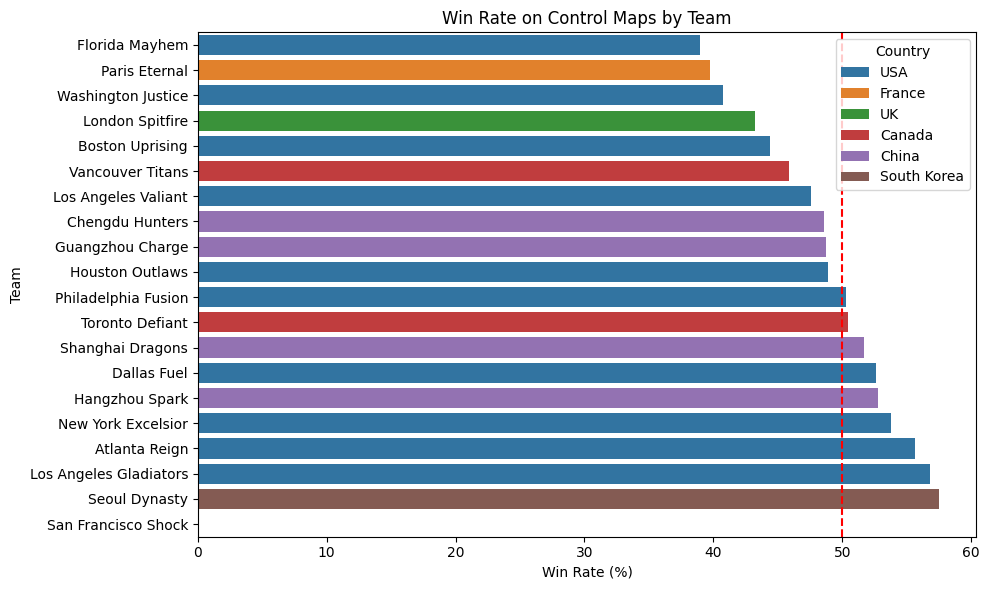

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=win_rate_df,
    x="win_rate",
    y="team",
    hue="country",
    dodge=False,
    orient="h"
)

# Add vertical line at 50%
plt.axvline(50, color="red", linestyle="--")

plt.xlabel("Win Rate (%)")
plt.ylabel("Team")
plt.title("Win Rate on Control Maps by Team")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


Win rates over time 
A teams *win rate on control maps* is the proportion of time they win the map, when the map type was a control map. 
- 4a)  Make a line plot of the Shanghai Dragons' win rate on control maps over the years. The x axis should be the year and the y axis should be win rate in a given year. 
- 4b)  Describe the Shanghai Dragons' win rate on control maps over time.
- 4c)  For each team whose win rate on control maps in 2022 was in the top 5, plot their win rates on control maps over the years. 
- 4d)  Make two observations about these plots. 

/tmp/ipykernel_6400/629788015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dragons["dragons_win"] = (df_dragons["map_winner"] == "Shanghai Dragons").astype(int)


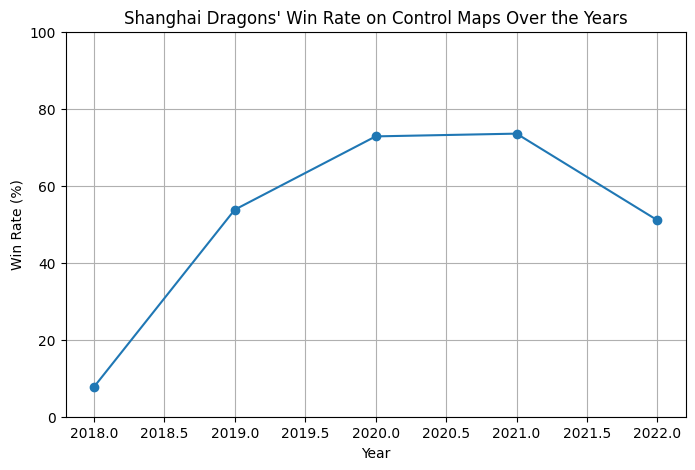

In [17]:
# Filter only control maps and matches involving Shanghai Dragons
df_dragons = df[(df["map_type"] == "control") & 
                ((df["team_one_name"] == "Shanghai Dragons") | (df["team_two_name"] == "Shanghai Dragons"))]

# Determine whether Shanghai Dragons won each control map
df_dragons["dragons_win"] = (df_dragons["map_winner"] == "Shanghai Dragons").astype(int)

# Calculate yearly win rate
dragons_yearly_winrate = df_dragons.groupby("year")["dragons_win"].mean() * 100

# Line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(dragons_yearly_winrate.index, dragons_yearly_winrate.values, marker="o", linestyle="-")
plt.title("Shanghai Dragons' Win Rate on Control Maps Over the Years")
plt.xlabel("Year")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.show()


The Shanghai Dragons started with a low win rate on control maps in earlier seasons but improved significantly over the years, reaching over 50% in later seasons. This suggests a strong upward trend and better performance in recent years

/tmp/ipykernel_6400/1826483817.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df["team_win"] = (team_df["map_winner"] == team).astype(int)
/tmp/ipykernel_6400/1826483817.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df["team_win"] = (team_df["map_winner"] == team).astype(int)
/tmp/ipykernel_6400/1826483817.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

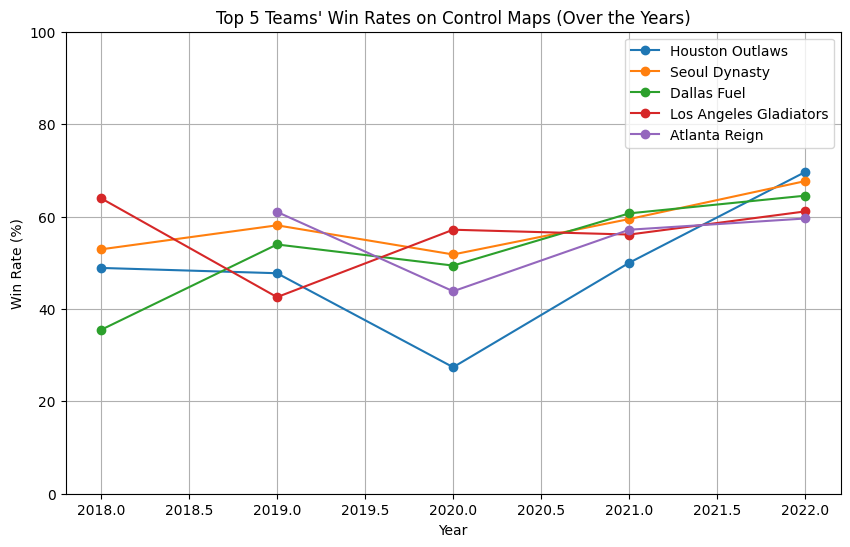

In [18]:
# Filter control maps in 2022
df_control_2022 = df[(df["map_type"] == "control") & (df["year"] == 2022)]

# Calculate 2022 win rates for each team
games_played_2022 = df_control_2022.groupby("map_winner").size().add(
    df_control_2022.groupby("map_loser").size(), fill_value=0
)
wins_2022 = df_control_2022.groupby("map_winner").size()
win_rate_2022 = (wins_2022 / games_played_2022 * 100).fillna(0)

# Get top 5 teams
top5_teams = win_rate_2022.sort_values(ascending=False).head(5).index.tolist()

# Compute yearly win rate for these teams
yearly_winrates = []
for team in top5_teams:
    team_df = df[(df["map_type"] == "control") & 
                 ((df["team_one_name"] == team) | (df["team_two_name"] == team))]
    team_df["team_win"] = (team_df["map_winner"] == team).astype(int)
    yearly_stats = team_df.groupby("year")["team_win"].mean() * 100
    yearly_winrates.append((team, yearly_stats))

# Plot each team
plt.figure(figsize=(10, 6))
for team, winrate in yearly_winrates:
    plt.plot(winrate.index, winrate.values, marker="o", label=team)

plt.title("Top 5 Teams' Win Rates on Control Maps (Over the Years)")
plt.xlabel("Year")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()


What map should Toronto work on improving? 

Suppose you have been contracted as an analyst for the Toronto Defiant team. 

- 5a)  There are different types of control maps, which can be found in the `control_round_name` column. Make a bar chart of Toronto's win rate on each individual control map (can be found in `control_round_name`) for 2022 and all time. For example, your plot might look like: 
<img src="WRTD.png" alt="drawing" width="500"/>
- 5b)  Which plot should be used to make reccommendations for Toronto in 2023? Based on this judgement and the plot you generated, what map should Toronto practice the most? Are there any problems with this analysis?
- 5c)   Assign each team a rank according to their 2022 control map win rate, with 1 being the highest win rate on control maps in 2022 and 20 being the lowest win rate on control maps in 2022. Print each team name with its rank beside it. 
- 5d)  Determine Toronto's three best and three worst control map names (by win rate) in 2022. Print the mean rank of the teams Toronto played for each of these maps. 
- 5e)  Compare the mean ranks on Toronto's best maps to their worst maps. What does this analysis reveal about Toronto's map-specific win rates?

/tmp/ipykernel_6400/4283660297.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toronto["toronto_win"] = (df_toronto["map_winner"] == "Toronto Defiant").astype(int)


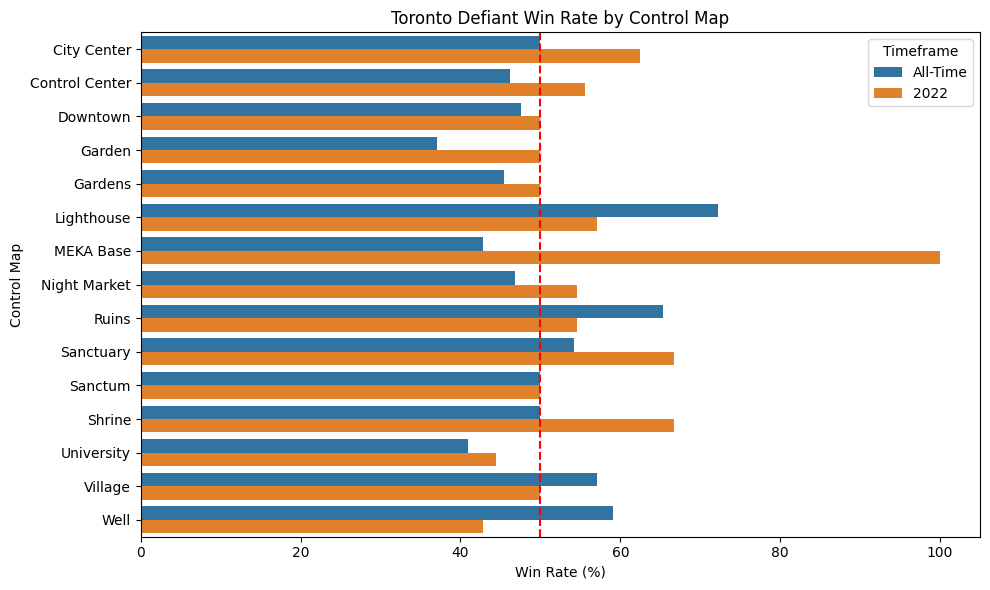

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter control maps involving Toronto Defiant
df_toronto = df[(df["map_type"] == "control") &
                ((df["team_one_name"] == "Toronto Defiant") | (df["team_two_name"] == "Toronto Defiant"))]

# Add a column indicating whether Toronto won
df_toronto["toronto_win"] = (df_toronto["map_winner"] == "Toronto Defiant").astype(int)

# ---- All-time win rate by control map ----
all_time_winrate = df_toronto.groupby("control_round_name")["toronto_win"].mean() * 100
all_time_winrate = all_time_winrate.reset_index().rename(columns={"toronto_win": "win_rate"})
all_time_winrate["timeframe"] = "All-Time"

# ---- 2022 win rate by control map ----
df_toronto_2022 = df_toronto[df_toronto["year"] == 2022]
winrate_2022 = df_toronto_2022.groupby("control_round_name")["toronto_win"].mean() * 100
winrate_2022 = winrate_2022.reset_index().rename(columns={"toronto_win": "win_rate"})
winrate_2022["timeframe"] = "2022"

# Combine both
toronto_winrate = pd.concat([all_time_winrate, winrate_2022])

# ---- Plot ----
plt.figure(figsize=(10, 6))
sns.barplot(
    data=toronto_winrate,
    x="win_rate",
    y="control_round_name",
    hue="timeframe",
    dodge=True,
    orient="h"
)

plt.axvline(50, color="red", linestyle="--")
plt.xlabel("Win Rate (%)")
plt.ylabel("Control Map")
plt.title("Toronto Defiant Win Rate by Control Map")
plt.legend(title="Timeframe")
plt.tight_layout()
plt.show()


The 2022 plot is more relevant for 2023 recommendations because it reflects the team’s most recent roster, strategy, and meta.

Based on the 2022 results, Toronto should practice the control map where they have the lowest win rate.

Potential issue: The analysis might be skewed if Toronto only played a few matches on certain maps (small sample size).

In [20]:
# Filter control maps in 2022
df_control_2022 = df[(df["map_type"] == "control") & (df["year"] == 2022)]

# Calculate wins and games played
games_2022 = df_control_2022.groupby("map_winner").size().add(
    df_control_2022.groupby("map_loser").size(), fill_value=0
)
wins_2022 = df_control_2022.groupby("map_winner").size()
win_rate_2022 = (wins_2022 / games_2022 * 100).fillna(0)

# Rank teams (1 = highest win rate)
rank_2022 = win_rate_2022.rank(ascending=False, method="min").astype(int)
rank_df = pd.DataFrame({"team": win_rate_2022.index, "win_rate": win_rate_2022.values, "rank": rank_2022.values})
rank_df = rank_df.sort_values(by="rank")

# Print team with rank
for _, row in rank_df.iterrows():
    print(f"{row['rank']}. {row['team']} - {row['win_rate']:.2f}%")


1. Houston Outlaws - 69.66%
2. Seoul Dynasty - 67.68%
3. Dallas Fuel - 64.52%
4. Los Angeles Gladiators - 61.11%
5. Atlanta Reign - 59.57%
6. London Spitfire - 55.42%
7. San Francisco Shock - 55.36%
8. Hangzhou Spark - 55.32%
9. Toronto Defiant - 53.68%
10. Shanghai Dragons - 51.02%
11. Florida Mayhem - 46.46%
12. Philadelphia Fusion - 44.95%
13. Los Angeles Valiant - 44.00%
14. Boston Uprising - 43.55%
15. Chengdu Hunters - 43.42%
16. Guangzhou Charge - 36.59%
16. Washington Justice - 36.59%
18. Vancouver Titans - 30.99%
19. New York Excelsior - 30.43%
20. Paris Eternal - 19.23%


In [21]:
# Win rate per control map for Toronto in 2022
toronto_map_win_2022 = df_toronto_2022.groupby("control_round_name")["toronto_win"].mean() * 100
toronto_map_win_2022 = toronto_map_win_2022.sort_values(ascending=False)

best_maps = toronto_map_win_2022.head(3).index.tolist()
worst_maps = toronto_map_win_2022.tail(3).index.tolist()

print("Toronto's 3 Best Maps in 2022:", best_maps)
print("Toronto's 3 Worst Maps in 2022:", worst_maps)

# Calculate mean rank of teams Toronto played on each map
def mean_rank_for_maps(map_list):
    opponents = df_toronto_2022[df_toronto_2022["control_round_name"].isin(map_list)]
    opponents["opponent"] = opponents.apply(lambda row: row["team_two_name"] if row["team_one_name"] == "Toronto Defiant" else row["team_one_name"], axis=1)
    return opponents.groupby("control_round_name")["opponent"].apply(lambda x: rank_df.set_index("team").loc[x, "rank"].mean())

best_maps_mean_rank = mean_rank_for_maps(best_maps)
worst_maps_mean_rank = mean_rank_for_maps(worst_maps)

print("\nMean Rank of Opponents on Best Maps:")
print(best_maps_mean_rank)
print("\nMean Rank of Opponents on Worst Maps:")
print(worst_maps_mean_rank)


Toronto's 3 Best Maps in 2022: ['MEKA Base', 'Sanctuary', 'Shrine']
Toronto's 3 Worst Maps in 2022: ['Village', 'University', 'Well']

Mean Rank of Opponents on Best Maps:
control_round_name
MEKA Base     1.000000
Sanctuary     3.666667
Shrine       14.666667
Name: opponent, dtype: float64

Mean Rank of Opponents on Worst Maps:
control_round_name
University    10.000000
Village       11.500000
Well          10.714286
Name: opponent, dtype: float64


/tmp/ipykernel_6400/1223956041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponents["opponent"] = opponents.apply(lambda row: row["team_two_name"] if row["team_one_name"] == "Toronto Defiant" else row["team_one_name"], axis=1)
/tmp/ipykernel_6400/1223956041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponents["opponent"] = opponents.apply(lambda row: row["team_two_name"] if row["team_one_name"] == "Toronto Defiant" else row["team_one_name"], axis=1)


Toronto’s best maps (MEKA Base and Sanctuary) show that they can compete with strong teams (opponents ranked 1 and 3). This means these maps align with their strengths and strategies.

On the worst maps (University, Village, Well), the average opponent ranks are around 10–11, meaning these aren’t top-tier teams, yet Toronto struggles on these maps.
This suggests a real map-specific weakness rather than just facing tough competition.



The league is considering changing the rules if too many matches (>5\%) end in a draw. The league organizers consider draws to be bad for the game. 


- 6a)  What proportion of escort maps end in a draw?
- 6b)  Make a bar plot of number of draws by map. Do certain escort maps have more draws? What proportion of draws happen on the maps with the two highest number of draws -- what would you tell the league organisers concerning this proportion?

In [24]:
escort_maps = df[df["map_type"] == "escort"]

# A draw occurs if both teams have the same final score
draws = escort_maps[escort_maps["winning_team_final_map_score"] == escort_maps["losing_team_final_map_score"]]

# Proportion of draws
draw_proportion = len(draws) / len(escort_maps) * 100
print(f"Proportion of escort maps ending in a draw: {draw_proportion:.2f}%")



Proportion of escort maps ending in a draw: 46.54%


/tmp/ipykernel_6400/3986858055.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=draws_by_map, x="num_draws", y="map_name", orient="h", palette="Blues_r")


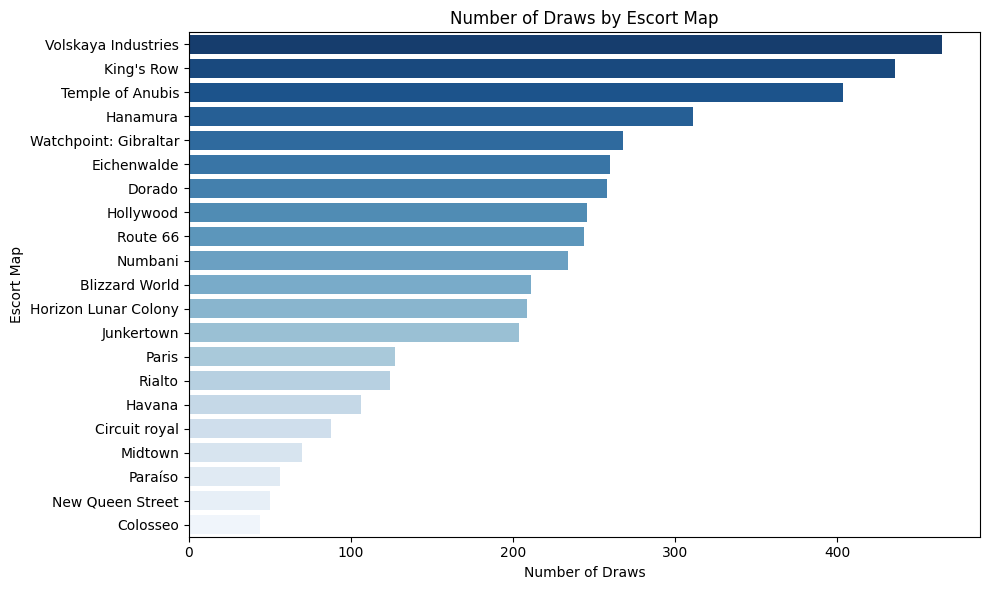

Proportion of draws on the top 2 maps: 20.41%


In [25]:
# Count draws by map
draws_by_map = draws.groupby("map_name").size().reset_index(name="num_draws")
draws_by_map = draws_by_map.sort_values(by="num_draws", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=draws_by_map, x="num_draws", y="map_name", orient="h", palette="Blues_r")
plt.xlabel("Number of Draws")
plt.ylabel("Escort Map")
plt.title("Number of Draws by Escort Map")
plt.tight_layout()
plt.show()

# Proportion of draws on top 2 maps
total_draws = len(draws)
top2_draws = draws_by_map.head(2)["num_draws"].sum()
proportion_top2 = (top2_draws / total_draws * 100) if total_draws > 0 else 0
print(f"Proportion of draws on the top 2 maps: {proportion_top2:.2f}%")



Since nearly half of the escort games end in draws, this is likely detrimental to the competitiveness and excitement of the matches.

Because only 20% of draws are caused by the top 2 maps, adjusting or redesigning just those maps will not fix the broader issue.

A rule change for all escort maps (e.g., new tie-breaker mechanisms or time-bank adjustments) might be necessary.


On escort maps, the attacker must push a "payload" a certain distance within an alotted time. If the attacker pushes the payload to the end of the map before the alotted time is up, then the attacker can bank that time. On the other hand, if the attacker does not push the payload to the end of the map, the distance they were able to push it is recorded. 

- 7a)  On maps where the attacker won the round, print the summary statistics of the `attacker_time_banked` column, along with a histogram of the `attacker_time_banked` column. On maps where the attacker lost the round, print the summary statistics of the `attacker_payload_distance` column, along with a histogram of the `attacker_payload_distance` column. 
- 7b)  Describe the characteristics of the histograms and interpret the summary statistics in the context of the data. 

Summary statistics for attacker_time_banked (attacker won):
count    4650.000000
mean      102.680841
std        94.727551
min         0.000000
25%         0.000000
50%        89.320032
75%       172.368532
max       404.037000
Name: attacker_time_banked, dtype: float64


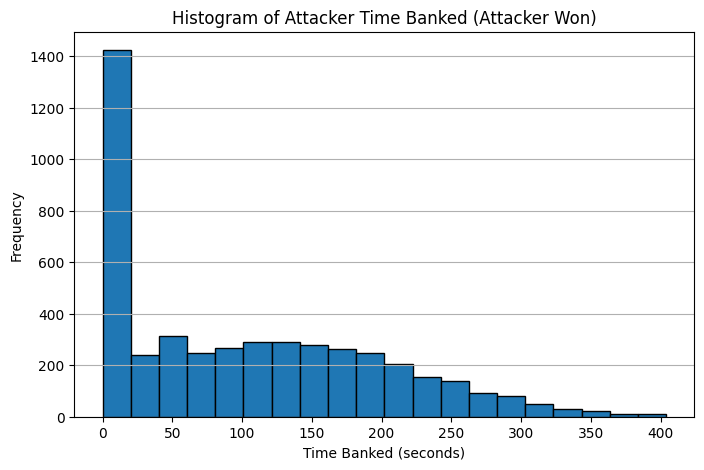


Summary statistics for attacker_payload_distance (attacker lost):
count    4473.000000
mean       46.778535
std        40.753654
min         0.000000
25%         0.000000
50%        59.329445
75%        81.696000
max       127.754380
Name: attacker_payload_distance, dtype: float64


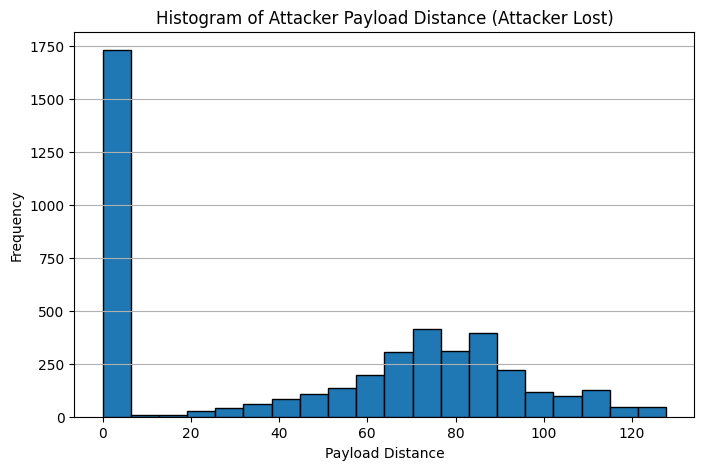

In [32]:
import matplotlib.pyplot as plt

# Filter only escort maps
escort_maps = df[df["map_type"] == "escort"]

# --- Attacker wins (attacker = map_winner) ---
attacker_wins = escort_maps[escort_maps["Attacker"] == escort_maps["map_winner"]]

# Summary statistics for attacker_time_banked
print("Summary statistics for attacker_time_banked (attacker won):")
print(attacker_wins["attacker_time_banked"].describe())

# Histogram for attacker_time_banked
plt.figure(figsize=(8, 5))
plt.hist(attacker_wins["attacker_time_banked"].dropna(), bins=20, edgecolor="black")
plt.title("Histogram of Attacker Time Banked (Attacker Won)")
plt.xlabel("Time Banked (seconds)")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

# --- Attacker losses (attacker = map_loser) ---
attacker_losses = escort_maps[escort_maps["Attacker"] == escort_maps["map_loser"]]

# Summary statistics for attacker_payload_distance
print("\nSummary statistics for attacker_payload_distance (attacker lost):")
print(attacker_losses["attacker_payload_distance"].describe())

# Histogram for attacker_payload_distance
plt.figure(figsize=(8, 5))
plt.hist(attacker_losses["attacker_payload_distance"].dropna(), bins=20, edgecolor="black")
plt.title("Histogram of Attacker Payload Distance (Attacker Lost)")
plt.xlabel("Payload Distance")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()


Interpretation of Attacker Time Banked (Attacker Won):
The mean time banked is about 103 seconds, but the median (50%) is ~89 seconds, suggesting many wins happen with around 1–2 minutes left.

The 25th percentile is 0, meaning at least 25% of wins occurred with no time banked (just barely on time), while the maximum is 404 seconds (6.7 minutes), showing some very dominant wins.

The histogram likely shows a right-skewed distribution, where most wins have little time banked, and only a few have extremely high time banks.

Interpretation of Attacker Payload Distance (Attacker Lost):
The mean payload distance is about 47 units, while the median is ~59 units, which means half of the losing attempts got more than halfway to the goal.

The 25th percentile is 0, indicating at least 25% of attackers barely moved the payload, while the maximum distance is 127.75 units, showing some rounds were close to completion but still ended in a loss.

The histogram for distance is likely bimodal, reflecting some attackers failing early and others almost succeeding.